### Student Information
Name: Michelle G F 黃明霞

Student ID: 110006311

GitHub ID: chellegrace855

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2


## 1. The Data & Data Preparation

In [2]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

dataset = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
dataset[0:5]

/Users/michellegrace/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [3]:
len(dataset)

1500

In [4]:
categories = dataset["sentiment"].unique()
categories

array(['not nostalgia', 'nostalgia'], dtype=object)

In [5]:
dataset["comment"][0:5]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
Name: comment, dtype: object

In [6]:
# this mean that there is at least a duplicate comments
len(dataset["comment"].unique()) == len(dataset)

False

## 2. Data Transformation


In [7]:
dataset["category"] = dataset["sentiment"].apply(lambda x: 1 if x == "nostalgia" else 0)
dataset[0:5]

,sentiment,comment,category
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1


## 3. Data Mining using Pandas

In [8]:
dataset.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)


sentiment    0
comment      0
category     0
dtype: int64

In [9]:
# No empty values
print("Total 0 in the row:", sum(dataset.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)))
print("Total 0 in the column:", sum(dataset.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)))

Total 0 in the row: 0
Total 0 in the column: 0


In [10]:
print("Total duplicates:", sum(dataset.duplicated()))


Total duplicates: 1


In [11]:
dataset.drop_duplicates(keep="first", inplace=True)
print("Total duplicates after removal:", sum(dataset.duplicated()))


Total duplicates after removal: 0


## 4. Data Preprocessing

In [12]:
dataset_sample = dataset.sample(n=1000)
print(len(dataset_sample))
dataset_sample[0:5]

1000


,sentiment,comment,category
1028,not nostalgia,"It's amazing to think that ""Bad, Bad Leroy Bro...",0
1336,nostalgia,"Its my mums favorite song, its a brilliant son...",1
989,nostalgia,2019 this song bring nice memories back to me ...,1
47,not nostalgia,First time I've come across a thread that is u...,0
1044,not nostalgia,"She sounds like an old friend. I mean, a reall...",0


In [13]:
# test that the sample is coming from the dataset data
print("All rows of dataset_sample is in dataset:", all(dataset_sample.isin(dataset).all(axis=1)))


All rows of dataset_sample is in dataset: True


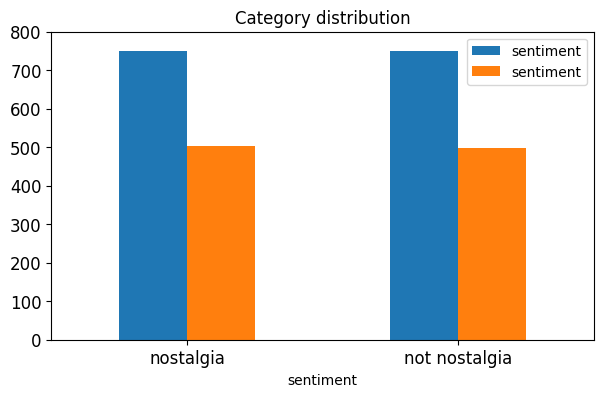

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
upper_bound = max(dataset_sample.sentiment.value_counts().max()+50, dataset.sentiment.value_counts().max()+50)
plotdata = pd.DataFrame({
    "dataset":dataset.sentiment.value_counts(),
    "dataset_sample":dataset_sample.sentiment.value_counts(),
    }, 
    index= ["nostalgia","not nostalgia"]
)
plotdata.plot(kind = 'bar',
            title = 'Category distribution',
            ylim = [0, upper_bound], 
            rot = 0, fontsize = 12, figsize = (7,4))
plt.title("Category distribution")
plt.xlabel("sentiment")
plt.legend(['sentiment', 'sentiment'], loc='upper right')


### Feature Creation

In [15]:
import nltk
nltk.download("punkt_tab")
dataset["unigrams"] = dataset["comment"].apply(lambda x: dmh.tokenize_text(x))
dataset["unigrams"][0:5]

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/michellegrace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
4    [listening, to, his, songs, reminds, me, of, m...
Name: unigrams, dtype: object

In [16]:
dataset[0:5]

,sentiment,comment,category,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m..."


In [17]:
list(dataset[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### Feature subset selection


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
dataset_counts = count_vect.fit_transform(dataset.comment) 
print(dataset_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [19]:
print(count_vect.get_feature_names_out()[1598])
print(count_vect.get_feature_names_out()[3570])
print(count_vect.get_feature_names_out()[2973])
print(count_vect.get_feature_names_out()[0:10])


he
was
singer
['00' '000' '045' '07' '10' '100' '10m' '11' '11th' '12']


In [20]:
analyze = count_vect.build_analyzer()
analyze(dataset.comment[0])


['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [21]:
print("Dataset count shape:" , dataset_counts.shape)
# we convert from sparse array to normal array
dataset_counts[0:5, 0:100].toarray()

Dataset count shape: (1499, 3730)


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [47]:
import numpy as np
# check the words where 1s in dataset_counts[3]
for i in range(3):
    print(count_vect.get_feature_names_out()[np.where(dataset_counts[3, 0:100].toarray() == 1)[1][i]])

1st
2nd
30


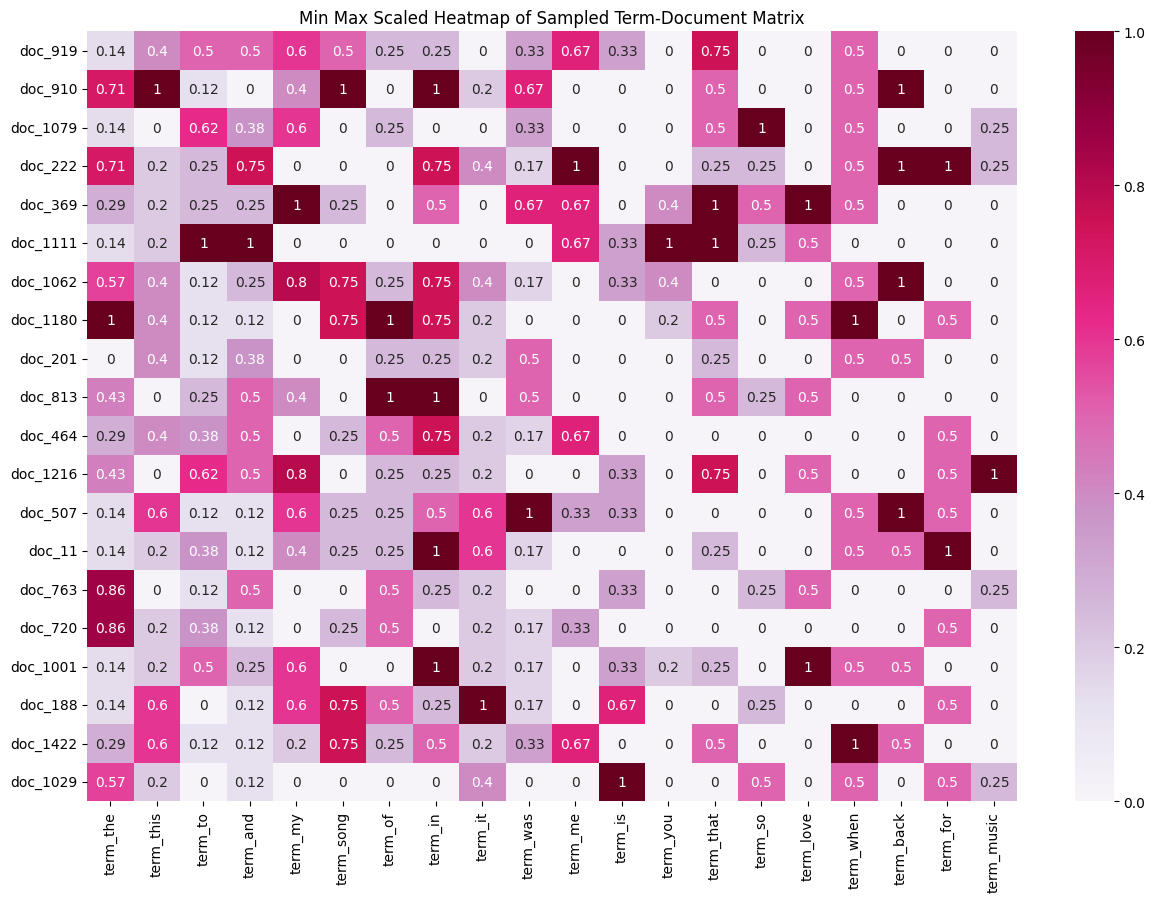

In [49]:
# Answer here
import seaborn as sns


# Instead of first 20 doc and first 20 term, I output the top 20 documents (top 20 documents that has the most words) and the top 20 terms (top 20 words that are used the most) to visualize it better and prevent too many sparsity
term_token_counts = dataset_counts.toarray().sum(axis=0)
document_token_counts = dataset_counts.toarray().sum(axis=1)

# Get the indices of the top 20 documents with the highest token counts
top_20_doc_indices = np.argsort(document_token_counts)[-20:][::-1] 
top_20_term_indices = np.argsort(term_token_counts)[-20:][::-1]  


plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_20_term_indices]]
plot_y = ["doc_"+ str(i) for i in list(dataset.index[top_20_doc_indices])]
plot_z = dataset_counts.toarray()

# To better visualize the heatmap, I scale the values using Min Max Scaling
sub_matrix = dataset_counts[top_20_doc_indices, :][:, top_20_term_indices].toarray() 
df_todraw = pd.DataFrame(sub_matrix, columns=plot_x, index=plot_y)
df_scaled = (df_todraw - df_todraw.min()) / (df_todraw.max() - df_todraw.min())

plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_scaled, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.title('Min Max Scaled Heatmap of Sampled Term-Document Matrix')
plt.show()



### Attribute Transformation / Aggregation

In [54]:
term_frequencies = []
for j in range(0,dataset_counts.shape[1]):
    term_frequencies.append(sum(dataset_counts[:,j].toarray()))
term_frequencies = np.asarray(dataset_counts.sum(axis=0))[0]
term_frequencies[4]

16

In [55]:
import plotly.express as px

terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# Use plotly
data = pd.DataFrame({'Term': terms, 'Frequency': frequencies})
fig = px.bar(data, x='Term', y='Frequency', title='Term Frequencies', labels={'Term': 'Terms', 'Frequency': 'Frequencies'})
fig.update_layout(xaxis_tickangle=-90, height=600, width=1200)
fig.show()

In [56]:
# Set a threshold of 50 to filter out all words that has frequency of less than 50, this is to efficiently reduce the number of terms that i visualize while maintaining the meaning of the visualization
frequency_threshold = 50 
filtered_indices = np.where(term_frequencies > frequency_threshold)[0]
terms = count_vect.get_feature_names_out()[filtered_indices]
frequencies = term_frequencies[filtered_indices]

data = pd.DataFrame({'Term': terms, 'Frequency': frequencies})
fig = px.bar(data, x='Term', y='Frequency', title='Term Frequencies', labels={'Term': 'Terms', 'Frequency': 'Frequencies'})
fig.update_layout(xaxis_tickangle=-90, height=600, width=1800)
fig.show()


In [57]:
# Answer here

# Visualize top 100 terms only 
top_n = 100 
top_indices = np.argsort(term_frequencies)[-top_n:][::-1] 

terms = count_vect.get_feature_names_out()[top_indices]
frequencies = np.array(term_frequencies)[top_indices]

data = pd.DataFrame({'Term': terms, 'Frequency': frequencies})
fig = px.bar(data, x='Term', y='Frequency', title='Term Frequencies', 
              labels={'Term': 'Terms', 'Frequency': 'Frequencies'})
fig.update_layout(xaxis_tickangle=-90, height=600, width=1600)
fig.show()

In [58]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Visualize top 100 terms only but now in log
top_n = 100 
top_indices = np.argsort(term_frequencies_log)[-top_n:][::-1] 

terms = count_vect.get_feature_names_out()[top_indices]
frequencies = np.array(term_frequencies_log)[top_indices]

data = pd.DataFrame({'Term': terms, 'Frequency': frequencies})
fig = px.bar(data, x='Term', y='Frequency', title='Term Frequencies', 
              labels={'Term': 'Terms', 'Frequency': 'Frequencies'})
fig.update_layout(xaxis_tickangle=-90, height=600, width=1600)
fig.show()

## 6. Data Mining
### Change to Term-Document Frequency DataFrame

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = dataset['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = dataset[dataset['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    dataset_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(dataset_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [61]:
category_number=0 
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
category_number=1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Filtering
For this task, since dataset is smaller than the Lab1, I filter using top 0.5% and bottom 2%

In [68]:

category_number=0 

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.005, bottom_percent=0.02):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])
    print(f"Filtered Term-Document Frequency DataFrame for Category {category}:")
    term_document_dfs[category]




For category not nostalgia we filter the following words:
Bottom 2.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
melodic          1
mood             1
moon             1
newcomers        1
netherlands      1
nelson           1
needed           1
necessary        1
nearly           1
nearest          1
nash             1
naples           1
nana             1
myanmar          1
moodier          1
musician         1
museum           1
mummy            1
muchm            1
ms               1
mph              1
moved            1
motor    

In [71]:
from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
# from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    # obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 749
Number of items : 2537
Minimum Transaction Size : 3
Average Transaction Size : 15.84913217623498
Maximum Transaction Size : 63
Standard Deviation Transaction Size : 8.976601532948193
Variance in Transaction Sizes : 80.68710151860233
Sparsity : 0.9937528056065293


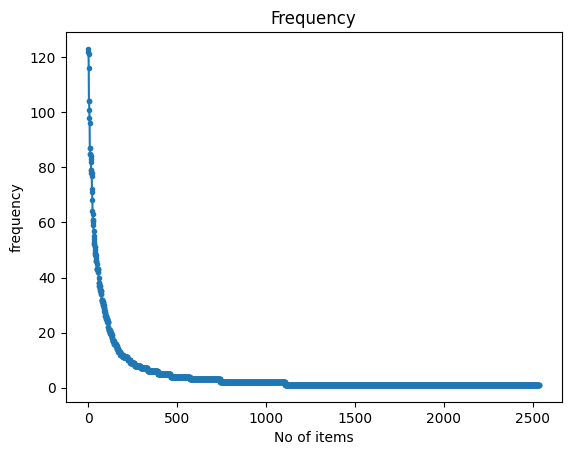

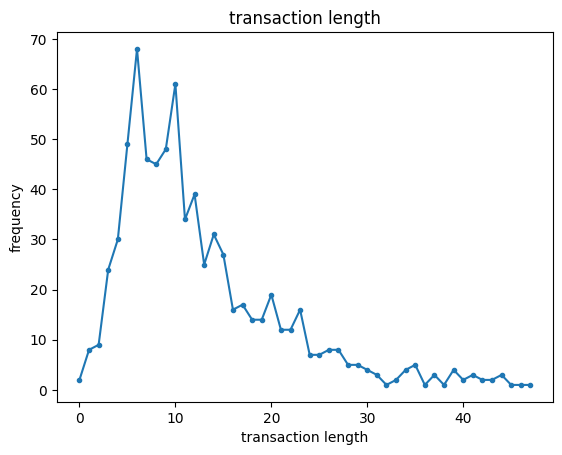

In [72]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 750
Number of items : 2239
Minimum Transaction Size : 2
Average Transaction Size : 16.934666666666665
Maximum Transaction Size : 61
Standard Deviation Transaction Size : 11.354869655301592
Variance in Transaction Sizes : 129.1052051624388
Sparsity : 0.9924365043918416


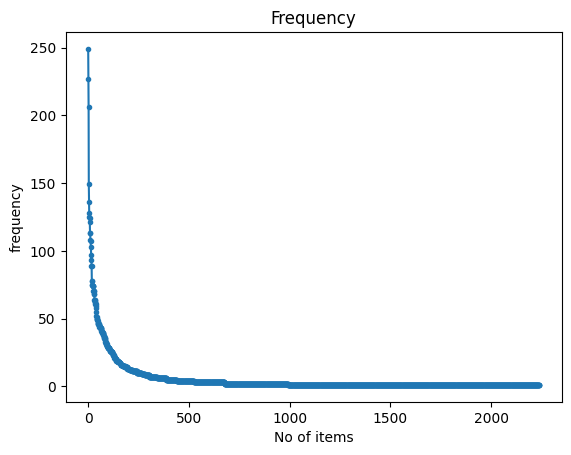

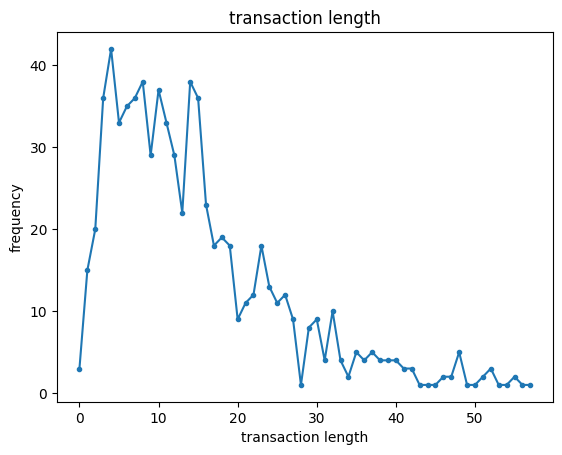

In [73]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### MaxFPGrowth

In [83]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg 
minSup=3
obj1 = alg.MaxFPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
frequentPatternsDF_nostalgia


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 14026
Runtime: 1.6597859859466553


,Patterns,Support
0,skating,3
1,walker,3
2,scott,3
3,memories years 17 1987,3
4,stop,3
...,...,...
14021,back memories when love,3
14022,back memories when years for,3
14023,back when so on,3
14024,back memories so on,3


In [84]:

minSup=3
obj1 = alg.MaxFPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
frequentPatternsDF_not_nostalgia

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 6698
Runtime: 0.33409905433654785


,Patterns,Support
0,thinks,3
1,months,3
2,currently,3
3,kids,3
4,wait,3
...,...,...
6693,for was one,3
6694,for have one,3
6695,music was have,3
6696,for was so,3


In [85]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                        Patterns  Support
9468        when remember young         9
20186                   with on         8
16678                  one come         8
18173                   time am         7
17147           music listening         7
...                          ...      ...
7054       when music are again         3
7053   years on music are again         3
7052              for are again         3
7051             love are again         3
10150      years for that heard         3

[20300 rows x 2 columns]
Number of patterns discarded: 424


In [86]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
dataset_tdm = count_vect.fit_transform(dataset['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
dataset['tokenized_text'] = dataset['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=dataset.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = dataset['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(dataset_tdm.toarray(), columns=terms, index=dataset.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,back is never again,love is never again,old are again,that is never again,time is never again,when music are again,years on music are again,for are again,love are again,years for that heard
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

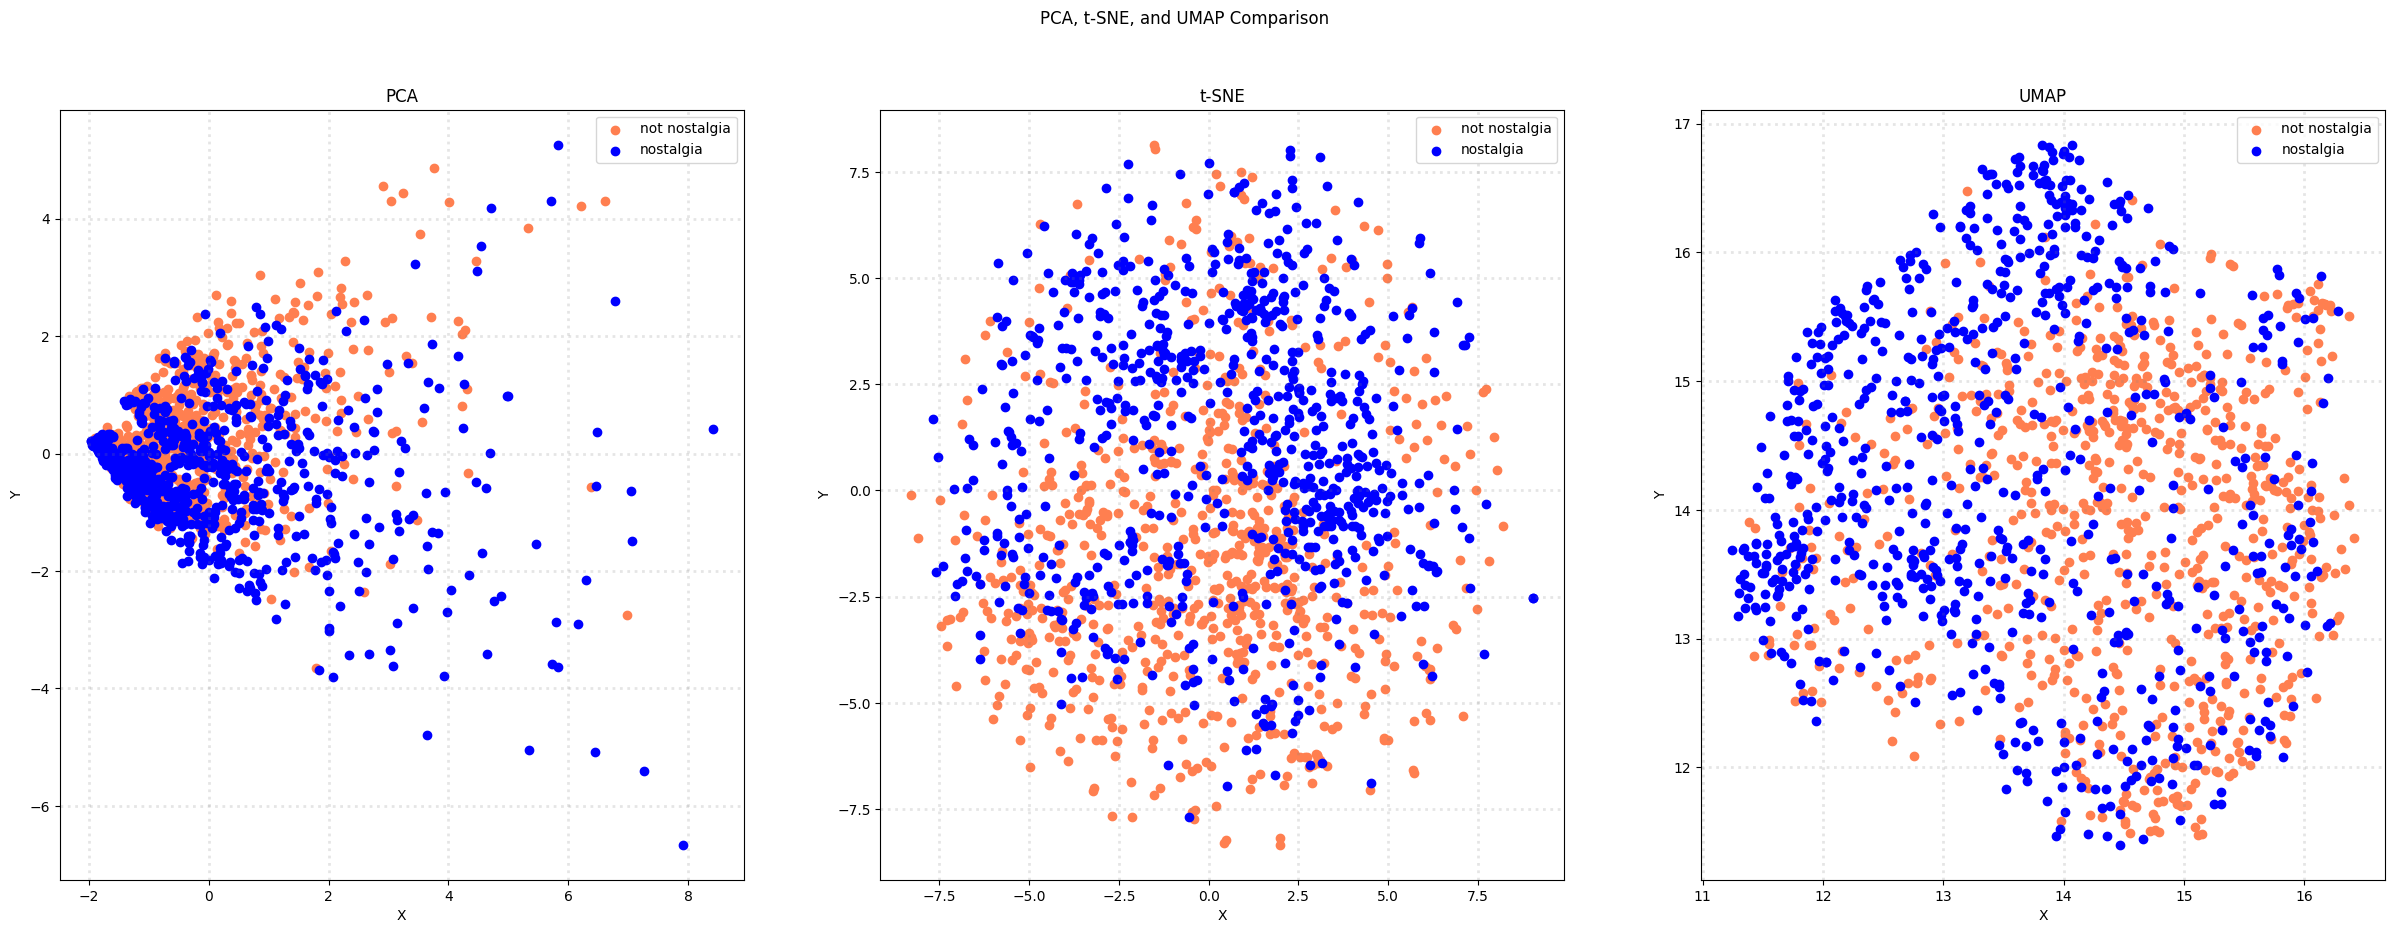

In [89]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = dataset['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[dataset['sentiment'] == category].T[0]
        ys = X_reduced[dataset['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [90]:
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)


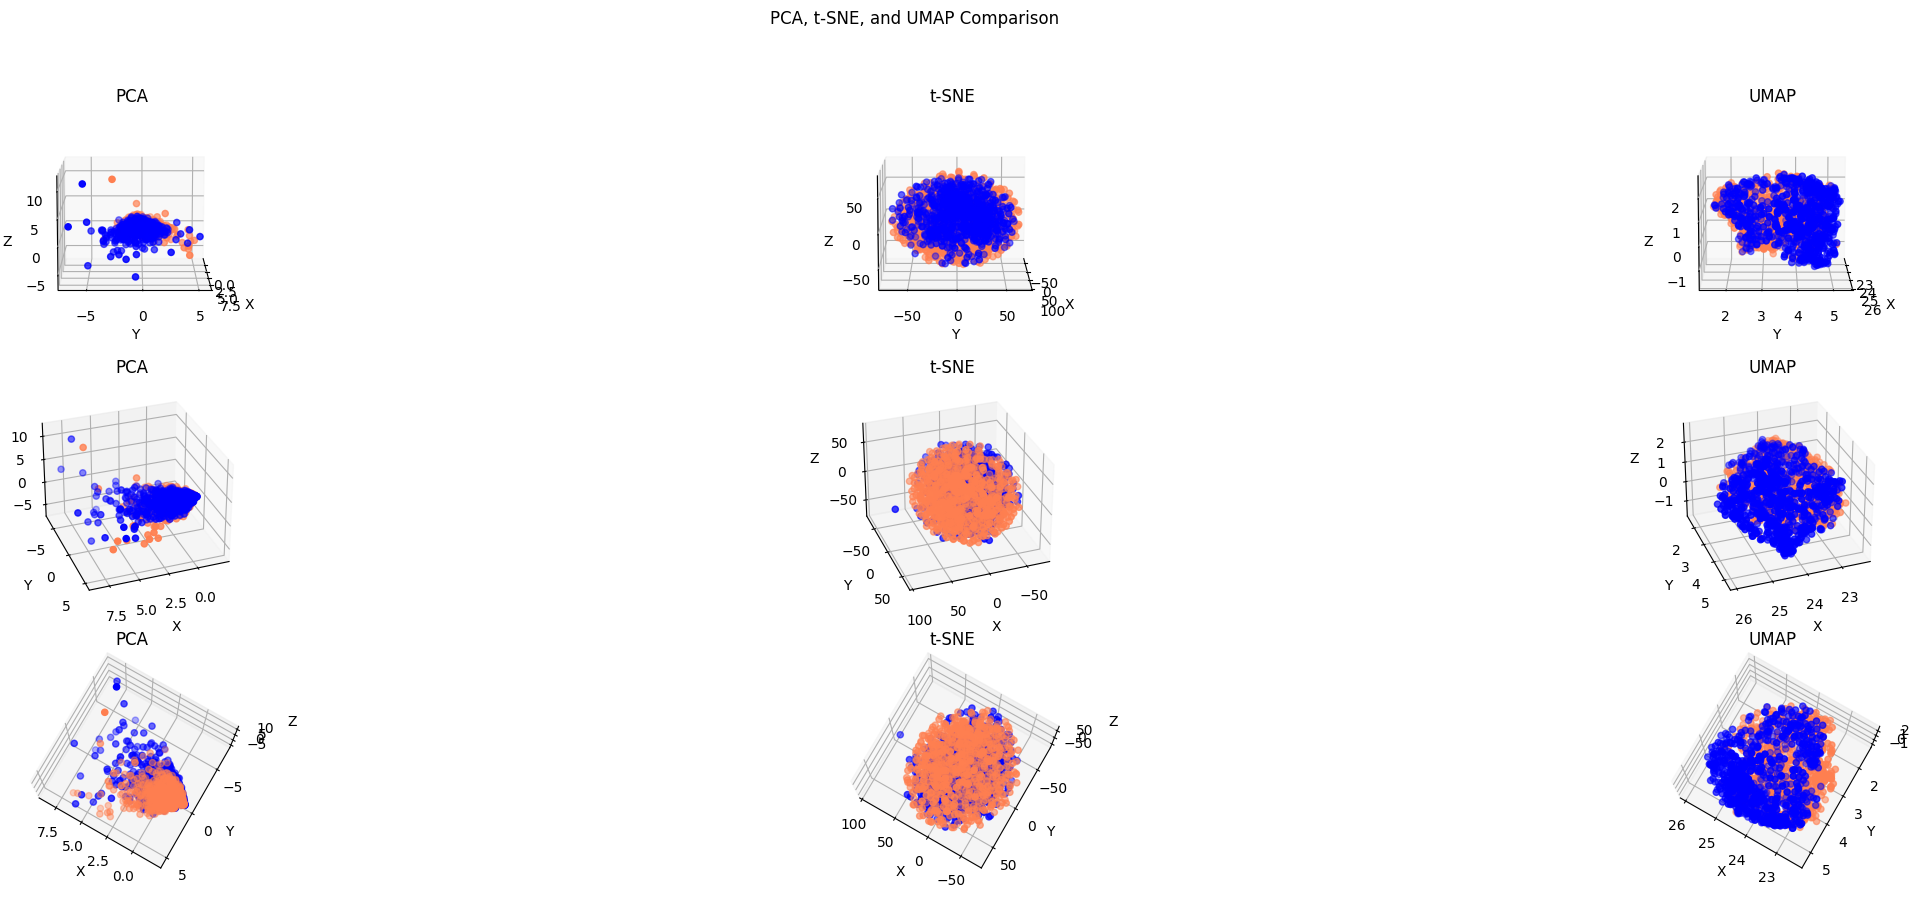

In [91]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = dataset['sentiment'].unique() 

fig, axes = plt.subplots(3, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter_3d(ax, X_reduced, title, angle, elevation):
    for c, category in zip(col, categories):
        xs = X_reduced[dataset['sentiment'] == category].T[0]
        ys = X_reduced[dataset['sentiment'] == category].T[1]
        zs = X_reduced[dataset['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
  
    ax.view_init(elev=elevation, azim=angle)



angles = [0, 70, 120]
elev = [10, 30, 80]
# Create scatter plots for PCA, t-SNE, and UMAP
for i in range(3):
    plot_scatter_3d(axes[i,0], X_pca_aug_3d, 'PCA', angles[i],elev[i])
    plot_scatter_3d(axes[i,1], X_tsne_aug_3d, 't-SNE',angles[i],elev[i])
    plot_scatter_3d(axes[i,2], X_umap_aug_3d, 'UMAP',angles[i],elev[i])


plt.show()

In [92]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(dataset.category)
dataset['bin_category'] = mlb.transform(dataset['category']).tolist()
dataset[0:9]

,sentiment,comment,category,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{a, still, relaxed,, love, can, was, for, emot...",[0]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{a, still, love, was, voice, him, The, his, to...",[1]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{just, a, job, how, love, it, was, 17., loving...",[1]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{a, for, can, served, all, song, leave, in, ba...",[0]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{who, me, listening, mum, songs, reminds, his,...",[1]
5,nostalgia,"Every time I heard this song as a child, I use...",1,"[Every, time, I, heard, this, song, as, a, chi...","{a, still, it, time, song, used, voice, to, ma...",[1]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{a, it, for, listening, was, how, in, back, th...",[1]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{a, love, TO, since, i, am, the, his, in, to, ...",[1]
8,not nostalgia,Wherever you are you always in my heart,0,"[Wherever, you, are, you, always, in, my, heart]","{are, Wherever, always, in, my, heart, you}",[0]


## 7. Data Exploration

In [94]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = dataset.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = dataset.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = dataset.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [95]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [96]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [97]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/mz/t_xgtgys08sd9yztf__zlr9h0000gn/T/ipykernel_9605/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/mz/t_xgtgys08sd9yztf__zlr9h0000gn/T/ipykernel_9605/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/mz/t_xgtgys08sd9yztf__zlr9h0000gn/T/ipykernel_9605/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/mz/t_xgtgys08sd9yztf__zlr9h0000gn/T/ipykernel_9605/452772485.py:17: Depreca

## 8. Data classification


In [99]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(dataset[['category','sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, dataset['sentiment'], test_size=0.3, random_state=42)

In [101]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(dataset[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, dataset['category'], test_size=0.3, random_state=42)

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8222    0.9528    0.8827       233
    nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [102]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9133333333333333

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8938    0.9309    0.9120       217
    nostalgia     0.9330    0.8970    0.9147       233

     accuracy                         0.9133       450
    macro avg     0.9134    0.9139    0.9133       450
 weighted avg     0.9141    0.9133    0.9134       450



In [104]:
dataset[0:5]

,sentiment,comment,category,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{a, still, relaxed,, love, can, was, for, emot...",[0]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{a, still, love, was, voice, him, The, his, to...",[1]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{just, a, job, how, love, it, was, 17., loving...",[1]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{a, for, can, served, all, song, leave, in, ba...",[0]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{who, me, listening, mum, songs, reminds, his,...",[1]


## 4th part
 Inefficiency that i notice is that we don't have Data Normalization or Scaling, therefore some words just happen much more frequent than others. Moreover, i believe it's necessary to drop all conjuctions or simple words that are not specific such as then, there, are, is,etc. 